In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData

In [3]:
from SplitData import Spliter
from sklearn.metrics.cluster import adjusted_rand_score

In [82]:
prefixFileName = "baron"
fileName = "Data/" + prefixFileName + "-prepare-log_count_100pca.csv"
df = pd.read_csv(fileName)
Xy= df.values
X= Xy[:,1:]
y= Xy[:,0].astype(int)
proportion_unknown = 0.2
left_out_proportion = 0.9
data_seed = 0
spl =  Spliter(proportion_unknown = proportion_unknown, left_out_proportion = left_out_proportion, random_seed = data_seed)
train_indices, test_indices, unknown_classes = spl.Split(X, y)

In [83]:
len(train_indices), len(test_indices), len(train_indices)+ len(test_indices)

(183, 1702, 1885)

In [6]:
X[train_indices].shape, X[test_indices].shape

((246, 100), (54, 100))

In [7]:
X_new = X[train_indices + test_indices]
y_new = y[train_indices + test_indices]

In [8]:
adata = AnnData(X=X_new)

In [9]:
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X')

In [10]:
adata

AnnData object with n_obs × n_vars = 300 × 100 
    uns: 'neighbors'

In [11]:
sc.tl.umap(adata)

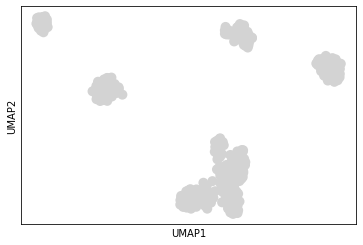

In [12]:
sc.pl.umap(adata)

In [13]:
# Run Louvain algorithm
sc.tl.louvain(adata, resolution=3.2)

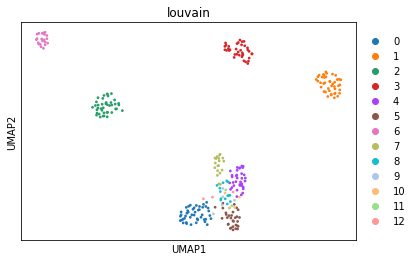

In [14]:
sc.pl.umap(adata, color=['louvain'], size = 30.1)

In [15]:
adata.obs['true_labels'] = y_new
adata.obs['true_labels'] = adata.obs['true_labels'].astype('category')

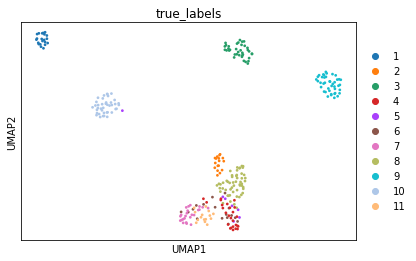

In [16]:
sc.pl.umap(adata, color=['true_labels'], size = 30.1)

In [17]:
## Use pre-information

In [18]:
y_train = y[train_indices]
y_test = y[test_indices]

In [19]:
for i in range(len(y_train)):
    for j in range(len(y_train)):
        if y_train[i] == y_train[j]:
            adata.uns['neighbors']['connectivities'][i,j] = 1.0
        else:
            adata.uns['neighbors']['connectivities'][i,j] = 0.0

/home/vanhoan310/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [20]:
sc.tl.louvain(adata, key_added='louvainsvm', resolution=3.2)

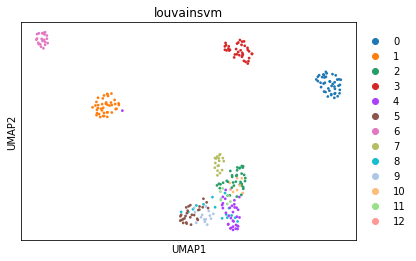

In [21]:
sc.pl.umap(adata, color=['louvainsvm'], size = 30.1)

In [22]:
predicted_louvainsvm = adata.obs['louvainsvm'].iloc[len(y_train): len(y_new)].values.astype(int)

In [23]:
adjusted_rand_score(predicted_louvainsvm, y_test)

0.7028618192033809

In [34]:
predicted_louvain = adata.obs['louvain'].iloc[len(y_train): len(y_new)].values.astype(int)

In [35]:
adjusted_rand_score(predicted_louvain, y_test)

0.5458279034869487

In [26]:
y_predicted_full = adata.obs['louvainsvm'].values.astype(int)

In [27]:
y_predicted_full

array([ 5,  3,  2, 10,  0,  1,  3,  2,  1,  3,  3,  9,  0,  1,  5,  0,  7,
        1,  5,  5,  1,  7,  9,  4,  6,  3,  5,  5,  2,  8,  6,  7,  1,  8,
        6,  2,  1,  3,  0,  1,  2,  2,  2,  0,  6, 10,  4,  0,  3,  0,  1,
        9,  5,  7,  8,  1,  2,  4,  7,  8,  4,  6,  1,  3,  8,  2,  9,  5,
        6,  0,  5,  3,  3,  3,  3,  7,  0,  8,  2,  4,  0,  6,  0,  2,  2,
        6,  2,  7,  7,  4,  1,  3,  3,  8,  2,  0,  6,  1,  2,  3,  1,  3,
        3,  6,  1,  0,  2,  0,  6,  4,  3,  0,  6,  3,  1,  2,  3, 12,  5,
       10,  5,  4,  0,  1,  2,  4,  1,  2,  0,  1,  0,  5,  0,  9,  2,  7,
        0,  6,  0,  0,  1,  1,  3,  3,  0,  3,  9,  2,  7,  9,  2,  3,  5,
        0,  2,  1,  9,  6,  3,  3,  2,  2,  2,  8,  9,  8,  1,  0,  8,  4,
        6, 10,  0,  7,  3, 11,  3,  6,  2,  1,  5,  0,  0,  2,  8,  6,  0,
        2,  3,  2,  1,  2,  7,  7,  5,  0,  1,  4,  2,  1,  7,  1,  2,  5,
        8,  9,  7,  2,  2,  8,  2,  7,  5,  1,  0,  3,  9,  5,  3,  1,  8,
        1,  0,  2,  9,  3

In [28]:
predicted_louvainsvm

array([ 6,  6,  6,  0,  3,  3,  3,  0,  0,  0,  0,  0, 11, 10, 10, 10,  5,
        5,  1,  1,  1,  1,  1,  1,  1,  4,  5,  5,  4,  4,  9,  4,  4,  5,
        4,  4,  4,  4, 11,  4,  4,  4,  4,  4,  4,  5,  4,  4,  4, 11,  4,
        4,  4,  4])

In [29]:
y_test

array([ 1,  1,  1,  9,  3,  3,  3,  9,  9,  9,  9,  9,  8,  8,  8,  8,  7,
        7, 10, 10, 10, 10, 10, 10, 10,  6,  6, 11,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4])

In [30]:
y_train

array([ 7,  3,  8,  8,  9, 10,  3,  8, 10,  3,  3, 11,  9, 10,  7,  9,  2,
       10,  7,  7, 10,  2, 11,  8,  1,  3,  7,  7,  8,  6,  1,  2, 10,  6,
        1,  8, 10,  3,  9, 10,  8,  8,  8,  9,  1,  8,  5,  9,  3,  9, 10,
       11,  7,  2,  6, 10,  8,  5,  2,  6,  8,  1, 10,  3,  6,  8, 11,  7,
        1,  9,  7,  3,  3,  3,  3,  2,  9,  6,  8,  5,  9,  1,  9,  8,  8,
        1,  8,  2,  2,  5, 10,  3,  3,  6,  8,  9,  1, 10,  8,  3, 10,  3,
        3,  1, 10,  9,  8,  9,  1,  8,  3,  9,  1,  3, 10,  8,  3,  8,  7,
        8,  7,  8,  9, 10,  8,  5, 10,  8,  9, 10,  9,  7,  9, 11,  8,  2,
        9,  1,  9,  9, 10, 10,  3,  3,  9,  3, 11,  8,  2, 11,  8,  3,  7,
        9,  8, 10, 11,  1,  3,  3,  8,  8,  8,  6, 11,  6, 10,  9,  6,  5,
        1,  8,  9,  2,  3,  8,  3,  1,  8, 10,  7,  9,  9,  8,  6,  1,  9,
        8,  3,  8, 10,  8,  2,  2,  7,  9, 10,  8,  8, 10,  2, 10,  8,  7,
        6, 11,  2,  8,  8,  6,  8,  2,  7, 10,  9,  3, 11,  7,  3, 10,  6,
       10,  9,  8, 11,  3

In [36]:
x = [1,2,3,4,5,6]

In [37]:
x[3:6]

[4, 5, 6]

In [38]:
adata.uns['neighbors']['connectivities']

<300x300 sparse matrix of type '<class 'numpy.float64'>'
	with 63016 stored elements in Compressed Sparse Row format>